In [1]:
!pip install ultralytics

In [25]:
from ultralytics import YOLO
from IPython.display import display, Image

In [14]:
import os
from torchvision import transforms
from PIL import Image
import random
import shutil


# Define augmentation transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.RandomVerticalFlip(),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
    transforms.ToTensor(),
])

# Path to your dataset images
data_dir = 'C:/Program Files/Python311/nlpfinal/train/images'
labels_dir = 'C:/Program Files/Python311/nlpfinal/train/labels'
augmented_dir = 'C:/Users/venka/OneDrive/Pictures/nlpfinal'

# Apply transformations to each image
for filename in os.listdir(data_dir):
    if filename.endswith('.jpg'):  # Apply augmentation only on .jpg images
        image_path = os.path.join(data_dir, filename)
        
        # Open the image using PIL
        image = Image.open(image_path)
        
        # Apply the transformations
        augmented_image_tensor = transform(image)
        
        # Convert tensor back to PIL image
        augmented_image_pil = transforms.ToPILImage()(augmented_image_tensor)
        
        # Save the augmented image
        augmented_image_pil.save(os.path.join(augmented_dir, filename))

In [21]:
from ultralytics import YOLO

# Path to your training dataset YAML file
data_yaml = 'C:/Program Files/Python311/nlpfinal/data.yaml'

# Path to the pre-trained YOLOv11 model (adjust if necessary)
model = "yolo11n.pt"  # You can use a pre-trained YOLOv11 model or initialize a new one

# Initialize the YOLO model with the pre-trained weights
yolo_model = YOLO(model)

# Train the model
yolo_model.train(
    data=data_yaml,  # Path to the dataset YAML file
    epochs=50,  # Number of epochs to train
    imgsz=640,  # Image size (you can adjust this)
    batch=16,  # Batch size (adjust according to your GPU memory)
    lr0=0.01,  # Initial learning rate
    lrf=0.01,  # Learning rate factor (adjust as needed)
    momentum=0.937,  # Optimizer momentum
    weight_decay=0.0005,  # Weight decay (for regularization)
    workers=4,  # Number of workers for data loading (adjust according to your system)
    device='cpu',  # Specify the device (0 for GPU, -1 for CPU)
)

# The training will run, and the results will be saved in the 'runs/train' folder


New https://pypi.org/project/ultralytics/8.3.46 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.29  Python-3.11.5 torch-2.4.1+cu121 CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:/Program Files/Python311/nlpfinal/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=4, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

100%|███████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 10.0MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning C:\Program Files\Python311\nlpfinal\train\labels...:   0%|          | 0/35 [00:00<?, ?it/s]Scanning C:\Program Files\Python311\nlpfinal\train\labels... 35 images, 0 backgrounds, 0 corrupt: 100%|█████████


train: New cache created: C:\Program Files\Python311\nlpfinal\train\labels.cache


C:\Program Files\Python311\Lib\site-packages\clearml\binding\import_bind.py:54: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  mod = builtins.__org_import__(


ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


C:\Program Files\Python311\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Program Files\Python311\nlpfinal\valid\labels...:   0%|          | 0/5 [00:00<?, ?it/s]Scanning C:\Program Files\Python311\nlpfinal\valid\labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 


val: New cache created: C:\Program Files\Python311\nlpfinal\valid\labels.cache
Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.165      4.845      2.246          6        640: 100%|██████████| 3/3 [00:13<00:00,  4.44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00172      0.444     0.0117    0.00227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.764      4.427      1.925          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00302      0.778     0.0184    0.00582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.703      4.267       1.86          4        640: 100%|██████████| 3/3 [00:11<00:00,  3.86
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00348      0.778     0.0645     0.0365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.701      4.327      1.869          8        640: 100%|██████████| 3/3 [00:11<00:00,  3.81
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00404      0.778       0.17      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.689      4.164      1.807          7        640: 100%|██████████| 3/3 [00:11<00:00,  3.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00524      0.889      0.348      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.599      4.262      1.722          5        640: 100%|██████████| 3/3 [00:12<00:00,  4.12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00614          1      0.407      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.335      3.711      1.524          7        640: 100%|██████████| 3/3 [00:13<00:00,  4.39
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00678          1      0.641      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G       1.26      3.799       1.48          8        640: 100%|██████████| 3/3 [00:11<00:00,  3.87
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00673          1      0.628      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.483      3.568      1.479          4        640: 100%|██████████| 3/3 [00:11<00:00,  3.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00701          1      0.697       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G       1.34      3.265      1.477          5        640: 100%|██████████| 3/3 [00:12<00:00,  4.06
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00725          1      0.641      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.295      3.711      1.501          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.92
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5     0.0072          1      0.692      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G       1.48      3.333      1.561          6        640: 100%|██████████| 3/3 [00:12<00:00,  4.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00717          1        0.7      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.522      3.143      1.489          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.94
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00756          1      0.903      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.545      3.406      1.603          4        640: 100%|██████████| 3/3 [00:12<00:00,  4.04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00732          1       0.89      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.305      3.307      1.337          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.97
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00766          1      0.675      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G       1.17      2.481       1.36          4        640: 100%|██████████| 3/3 [00:11<00:00,  3.98
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00698          1      0.673      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.059      3.039      1.362          4        640: 100%|██████████| 3/3 [00:12<00:00,  4.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00646          1      0.673      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.222      2.275      1.411          7        640: 100%|██████████| 3/3 [00:12<00:00,  4.01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00617          1      0.645      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.345      2.711      1.489          5        640: 100%|██████████| 3/3 [00:12<00:00,  4.10
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00559          1      0.877       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.286      2.753        1.4          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.99
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00556          1       0.89      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.108      2.266      1.361          3        640: 100%|██████████| 3/3 [00:12<00:00,  4.12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5    0.00538          1      0.922      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.238       2.31      1.365          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.98
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.861       0.45       0.73        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.122      2.148      1.286          5        640: 100%|██████████| 3/3 [00:11<00:00,  3.99
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.909      0.333       0.73      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.105      1.905      1.301          9        640: 100%|██████████| 3/3 [00:11<00:00,  3.96
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.912      0.333      0.677      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.134      1.845      1.246          7        640: 100%|██████████| 3/3 [00:11<00:00,  3.93
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.904      0.333      0.912      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.406      2.288      1.437          7        640: 100%|██████████| 3/3 [00:12<00:00,  4.31
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.905      0.333      0.909      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.204       2.39      1.386          5        640: 100%|██████████| 3/3 [00:17<00:00,  5.86
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5       0.91      0.333      0.907      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.183      2.902      1.271          2        640: 100%|██████████| 3/3 [00:12<00:00,  4.22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.555      0.634        0.7      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.295      2.131      1.337          7        640: 100%|██████████| 3/3 [00:14<00:00,  4.89
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.555      0.634        0.7      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.221      1.994      1.302         10        640: 100%|██████████| 3/3 [00:13<00:00,  4.44
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.555      0.674      0.703      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.262      2.065      1.396          6        640: 100%|██████████| 3/3 [00:13<00:00,  4.60
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.778      0.858       0.94        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.187      2.352      1.334          5        640: 100%|██████████| 3/3 [00:16<00:00,  5.37
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.666      0.868      0.951      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.225      2.671      1.386          2        640: 100%|██████████| 3/3 [00:14<00:00,  4.68
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.666      0.868      0.951      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.249      2.027      1.335          5        640: 100%|██████████| 3/3 [00:12<00:00,  4.19
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.672       0.86      0.774      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G       1.11      1.972      1.267          6        640: 100%|██████████| 3/3 [00:11<00:00,  3.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.661      0.855       0.94      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.117      1.785      1.255          8        640: 100%|██████████| 3/3 [00:11<00:00,  3.91
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.662      0.844      0.774      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.105      2.117      1.292          4        640: 100%|██████████| 3/3 [00:11<00:00,  3.92
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.662      0.844      0.774      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.257      2.444      1.404          5        640: 100%|██████████| 3/3 [00:11<00:00,  3.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5       0.67      0.827      0.932      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.131      2.135      1.292          4        640: 100%|██████████| 3/3 [00:12<00:00,  4.02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5       0.66       0.84      0.926       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9941      2.411      1.252          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.82
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.575      0.889       0.76      0.418
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9886      2.151      1.226          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.81
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.575      0.889       0.76      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9897      2.193      1.297          3        640: 100%|██████████| 3/3 [00:14<00:00,  4.70
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.573      0.889      0.922      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9867      2.253      1.338          3        640: 100%|██████████| 3/3 [00:13<00:00,  4.35
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.692      0.885       0.94      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9013       1.97      1.081          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.85
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.762      0.871       0.94      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.8905      2.136      1.132          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.97
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.762      0.871       0.94      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9504      2.438      1.348          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.75
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5        0.8      0.864      0.968       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.9101      2.265      1.211          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.80
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.838      0.846      0.968      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.8244      2.012      1.133          3        640: 100%|██████████| 3/3 [00:12<00:00,  4.25
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.874      0.822      0.968      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.8911      2.028      1.182          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.76
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.874      0.822      0.968      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.8485      2.177      1.227          3        640: 100%|██████████| 3/3 [00:11<00:00,  3.85
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.899      0.802      0.968      0.555

50 epochs completed in 0.193 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 5.5MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.29  Python-3.11.5 torch-2.4.1+cu121 CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all          5          5      0.899      0.802      0.968      0.555
              iloveyou          3          3          1      0.406      0.913      0.471
                please          1          1      0.756          1      0.995      0.597
                   yes          1          1      0.941          1      0.995      0.597
Speed: 1.6ms preprocess, 77.3ms inference, 0.0ms loss, 13.2ms postprocess per image
Results saved to runs\detect\train2
2024-12-07 00:30:55,738 - clearml.storage - INFO - Starting upload: runs\detect\train2\weights\best.pt => https://files.clear.ml/Ultralytics/train2.182f6f9c07d045a58eedb6cc97fecd6d/models/best.pt


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 3, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021680745C10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

2024-12-07 00:30:59,146 - clearml.storage - INFO - Uploading: 5.22MB to runs\detect\train2\weights\best.pt


████████████████████████████████▉ 100% | 5.22/5.22 MB [00:00<00:00, 18.99MB/s]: 


2024-12-07 00:30:59,434 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/Ultralytics/train2.182f6f9c07d045a58eedb6cc97fecd6d/models/best.pt


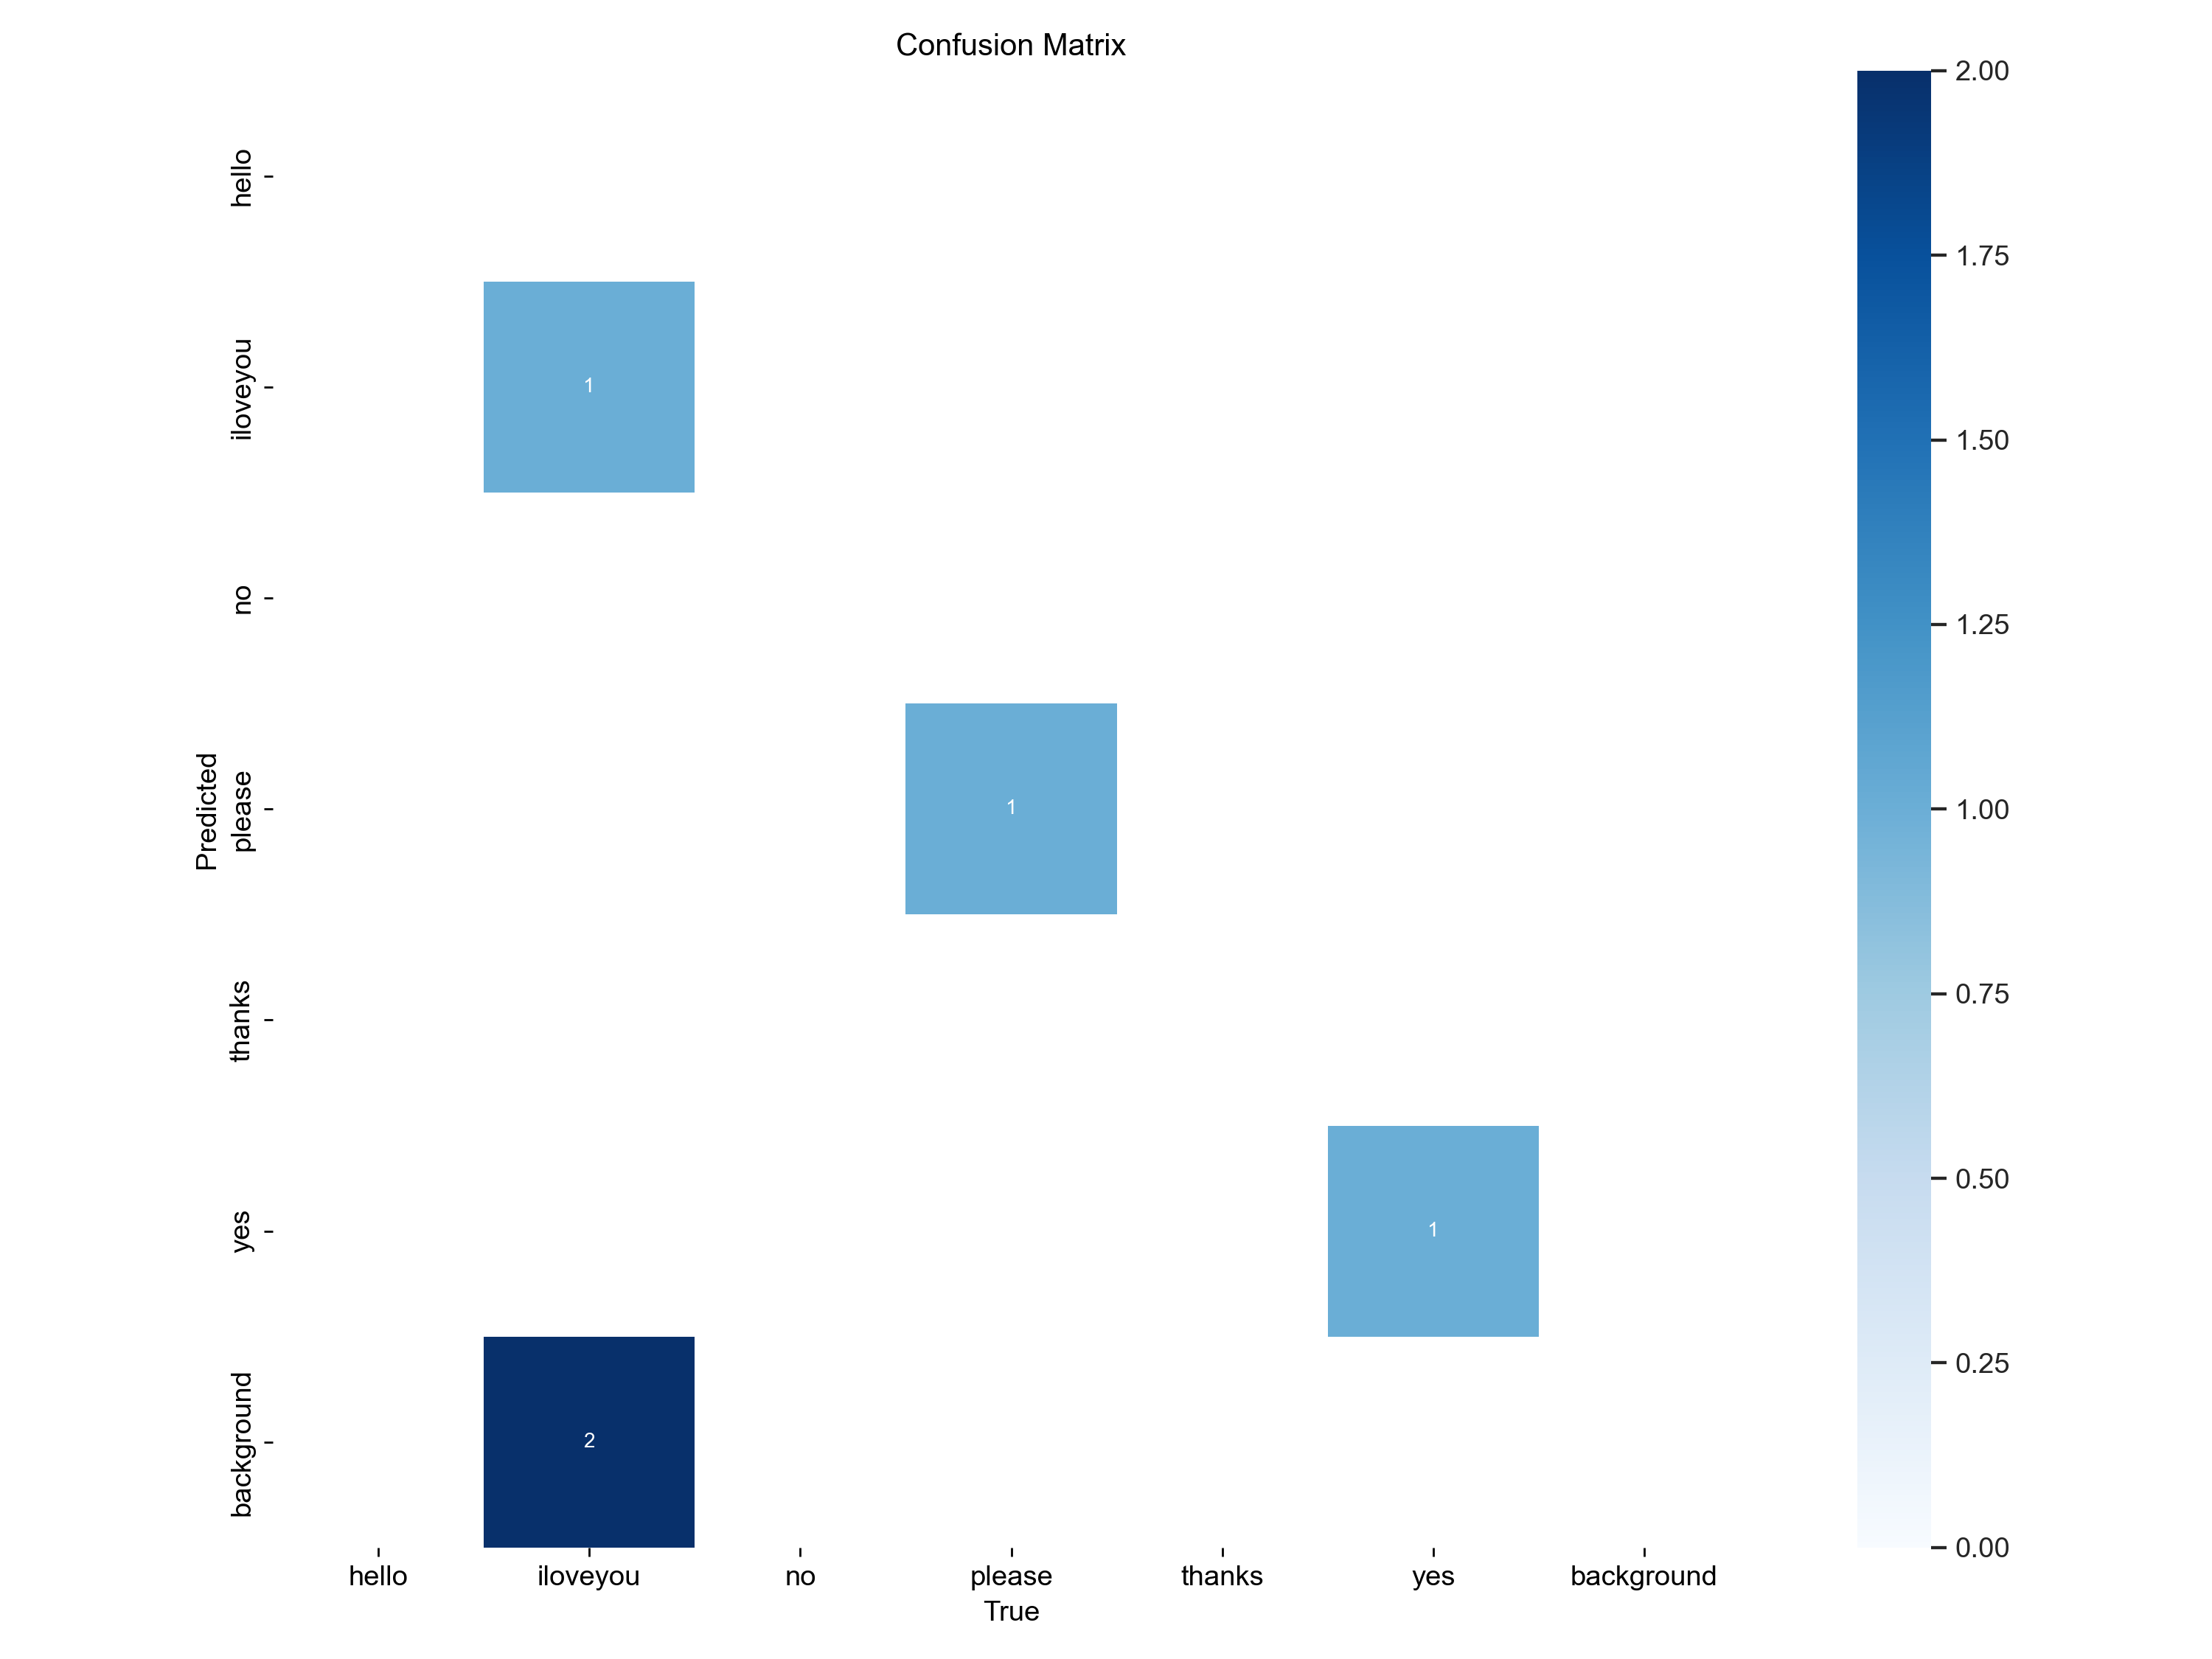

In [29]:
Image("C:/Program Files/Python311/nlpfinal/runs/detect/train2/confusion_matrix.png", width=600)

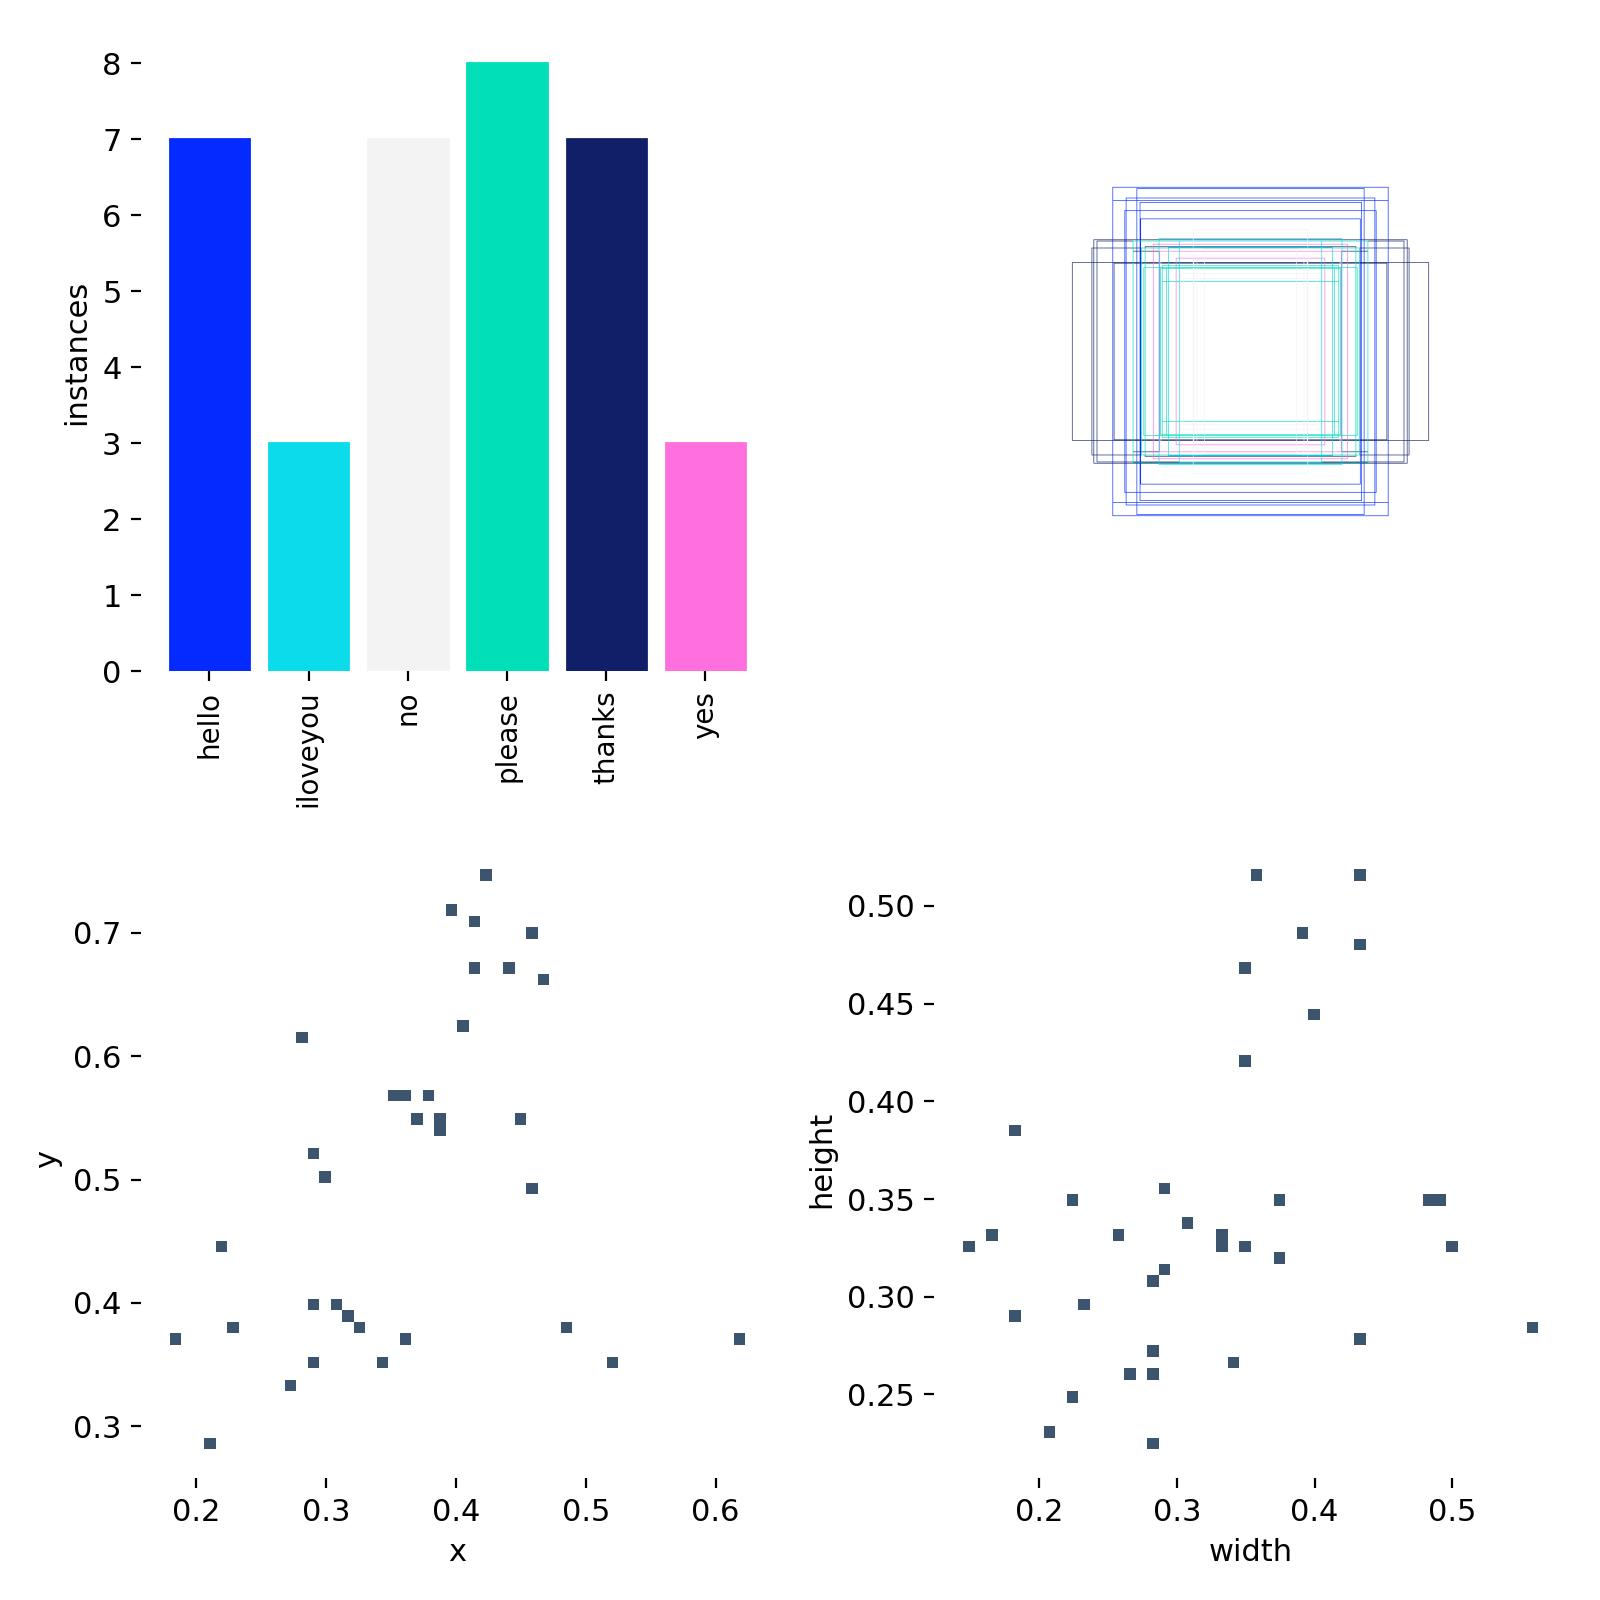

In [32]:
Image("C:/Program Files/Python311/nlpfinal/runs/detect/train2/labels.jpg", width=600)

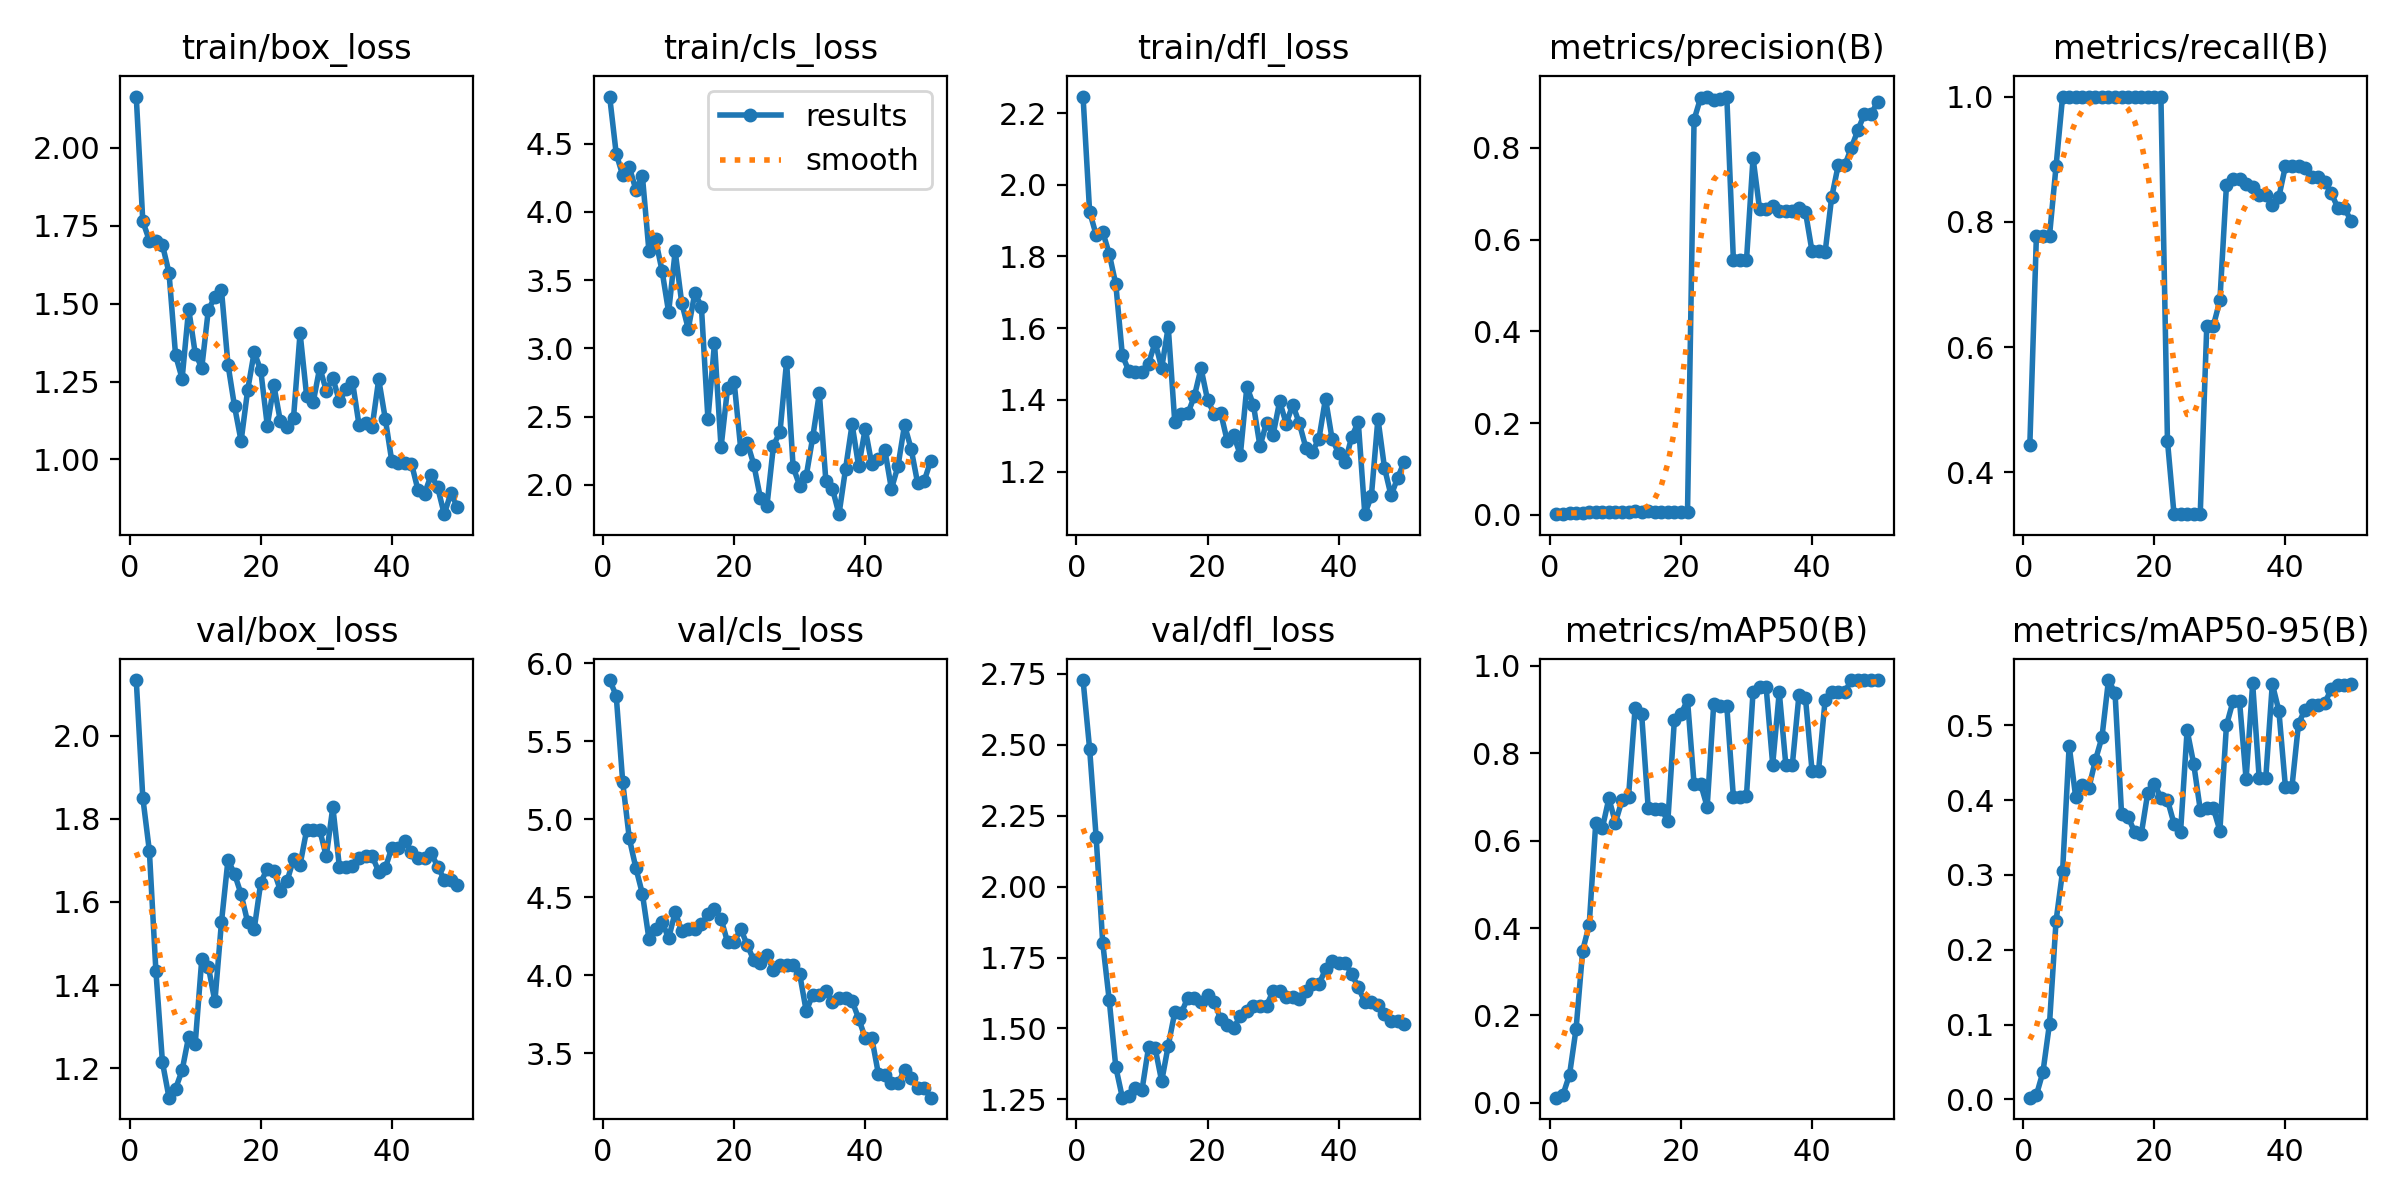

In [33]:
Image("C:/Program Files/Python311/nlpfinal/runs/detect/train2/results.png", width=600)

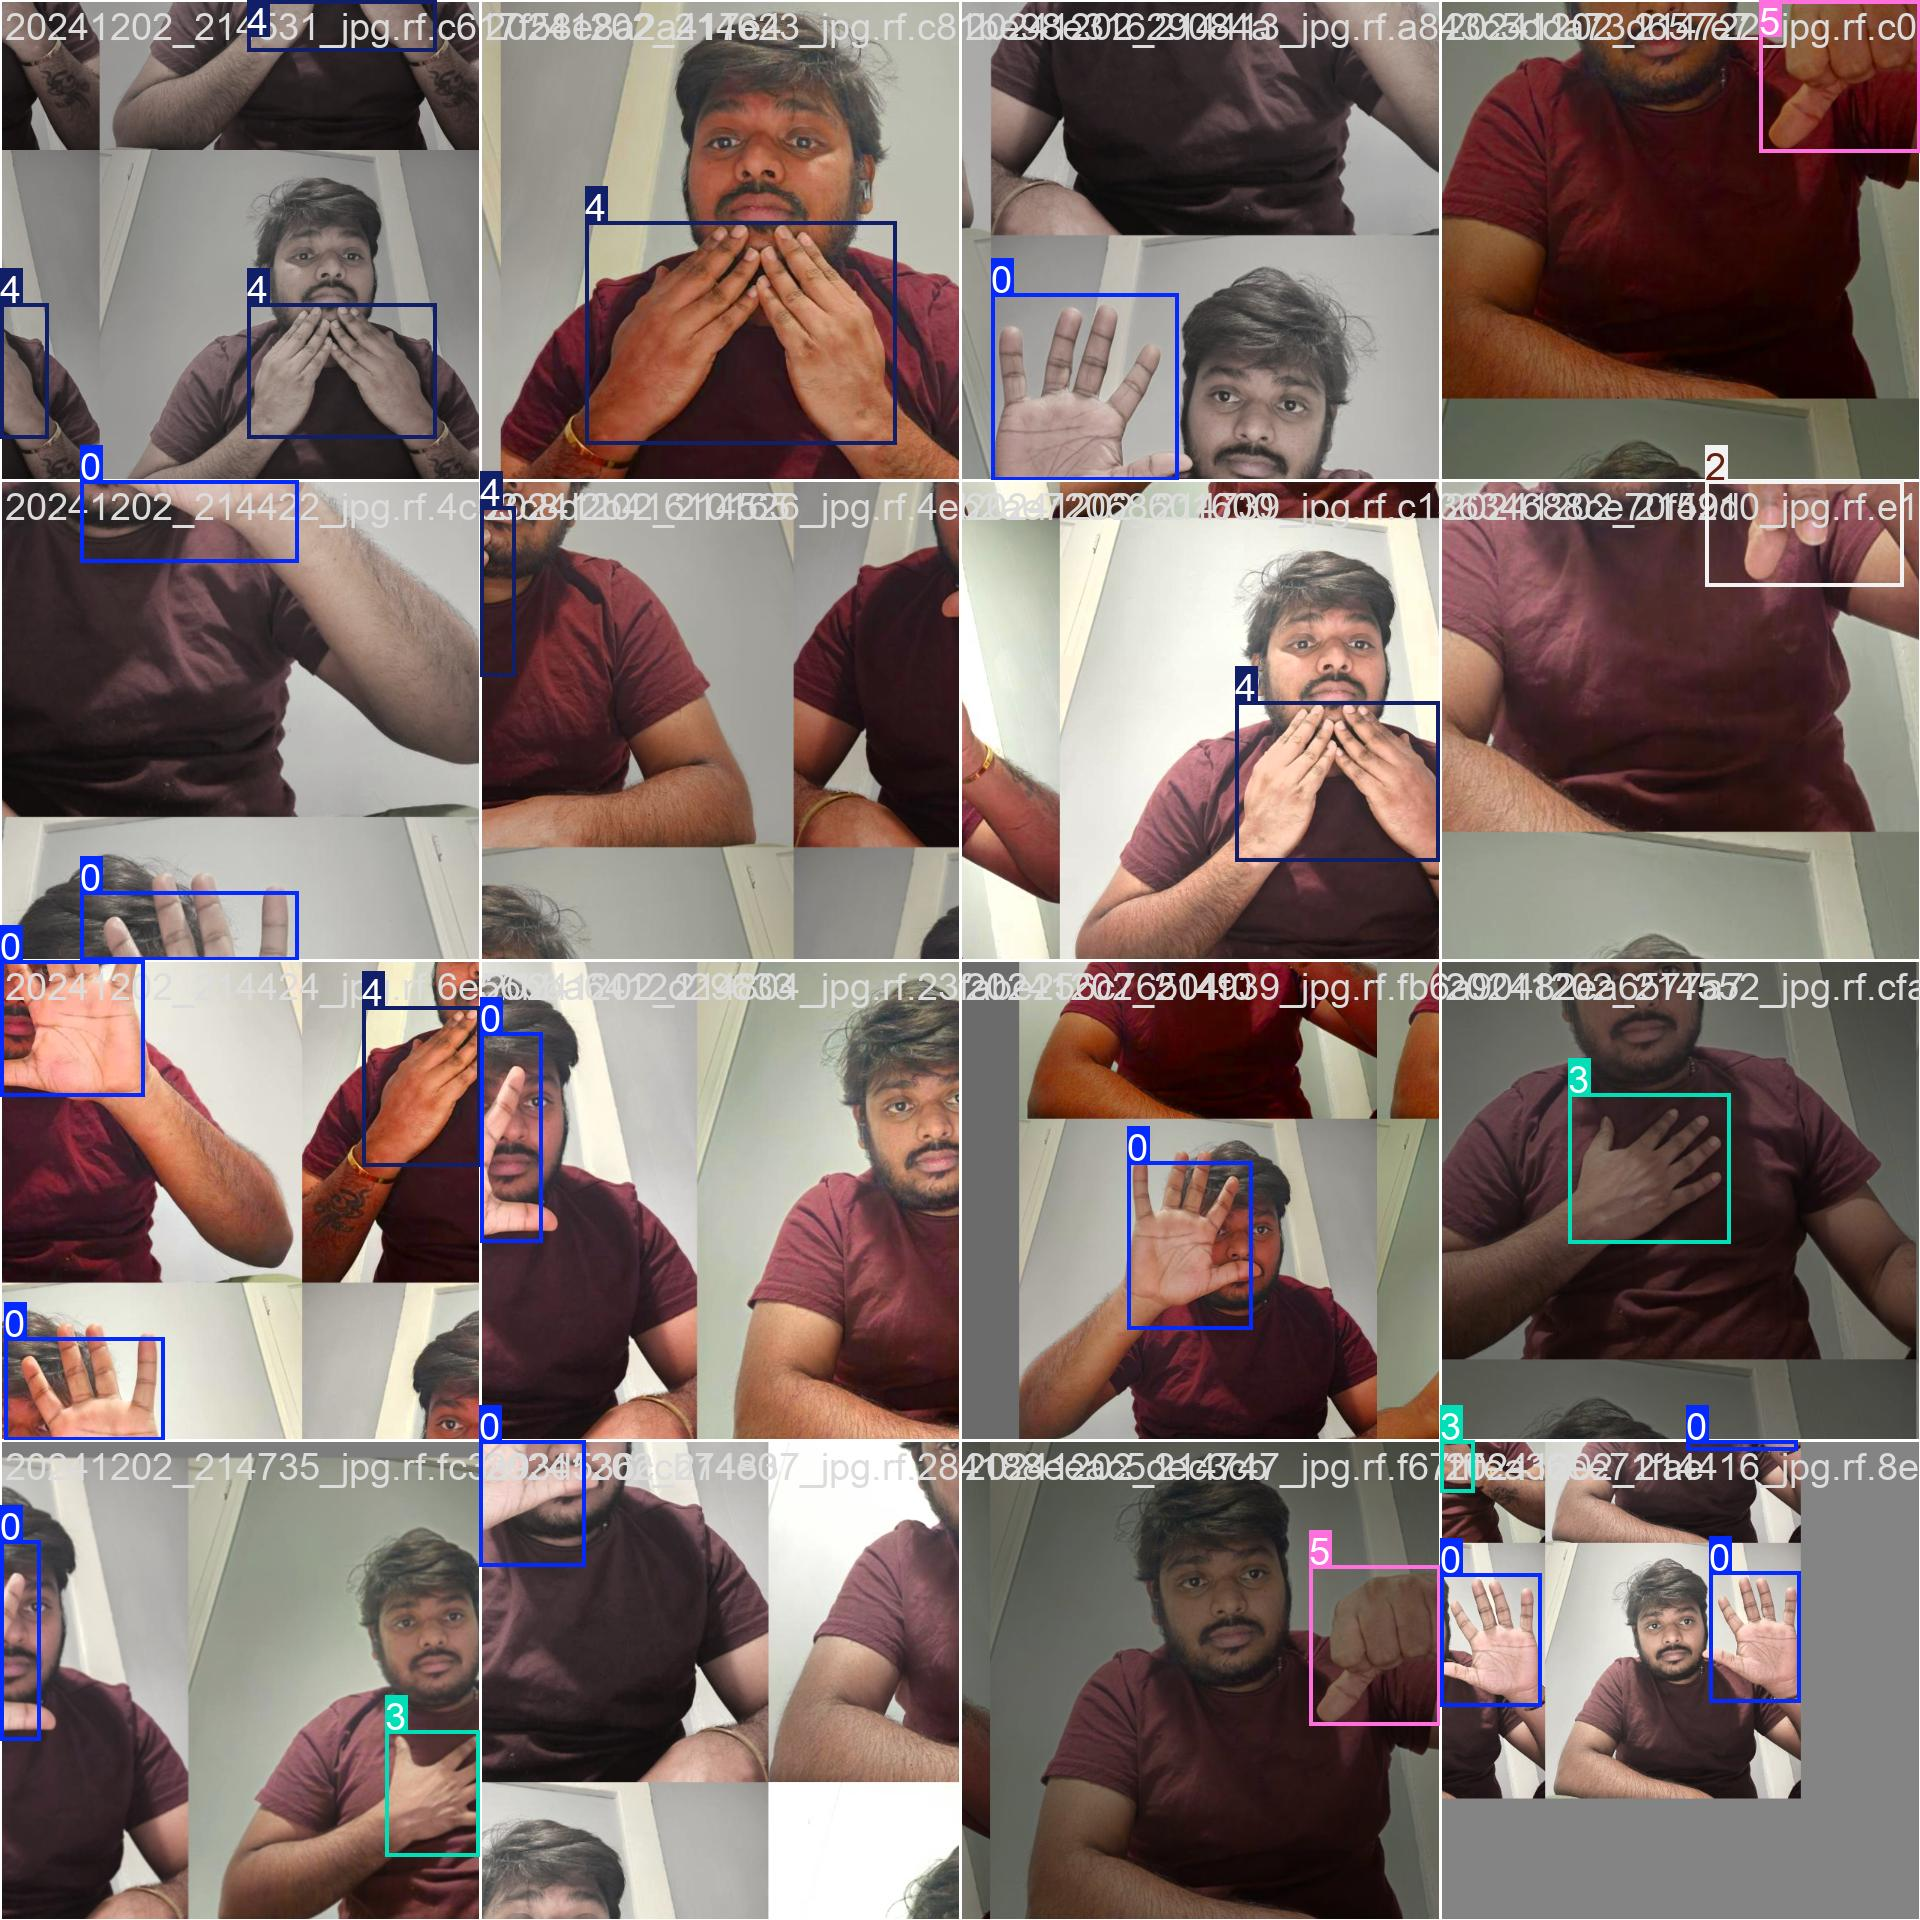

In [34]:
Image("C:/Program Files/Python311/nlpfinal/runs/detect/train2/train_batch0.jpg", width=600)

In [39]:
from ultralytics import YOLO

# Path to your trained YOLOv5 model
model_path = "C:/Program Files/Python311/nlpfinal/runs/detect/train2/weights/best.pt"

# Path to your test dataset (images you want to make predictions on)
test_images_path = "C:/Program Files/Python311/nlpfinal/test/images"

# Initialize the YOLO model with the pre-trained weights
yolo_model = YOLO(model_path)

# Run the YOLO model in prediction mode with the specified settings
results=yolo_model.predict(
    source=test_images_path,   # Path to your test images
    conf=0.1,                  # Confidence threshold (0.1)
    save=True,                 # Save the output images with predictions
    imgsz=640,                 # Image size (640x640, adjust if necessary)
    batch=16,                  # Batch size (adjust according to your system's capabilities)
    device='cpu'               # Set to 'cpu' or 'cuda' for GPU usage
)

# Optionally, print the results after prediction
print(f"Prediction completed! The results are saved in the corresponding directory.")



image 1/5 C:\Program Files\Python311\nlpfinal\test\images\20241202_214609_jpg.rf.d6136bea16d3ca303f441de1d7b0c764.jpg: 640x640 1 yes, 65.9ms
image 2/5 C:\Program Files\Python311\nlpfinal\test\images\20241202_214615_jpg.rf.f7cc343fd1429d95ff4af489347a70ac.jpg: 640x640 1 yes, 65.9ms
image 3/5 C:\Program Files\Python311\nlpfinal\test\images\20241202_214628_jpg.rf.e5a818ce5e6a1beb653edfde99cc91c6.jpg: 640x640 1 yes, 65.9ms
image 4/5 C:\Program Files\Python311\nlpfinal\test\images\20241202_214814_jpg.rf.381e099a7289e1b30da480dc5237cb93.jpg: 640x640 1 iloveyou, 65.9ms
image 5/5 C:\Program Files\Python311\nlpfinal\test\images\20241202_214831_jpg.rf.0555375cc2a7df7e1f327be267a47213.jpg: 640x640 (no detections), 65.9ms
Speed: 3.1ms preprocess, 65.9ms inference, 0.4ms postprocess per image at shape (5, 3, 640, 640)
Results saved to runs\detect\predict2
Prediction completed! The results are saved in the corresponding directory.


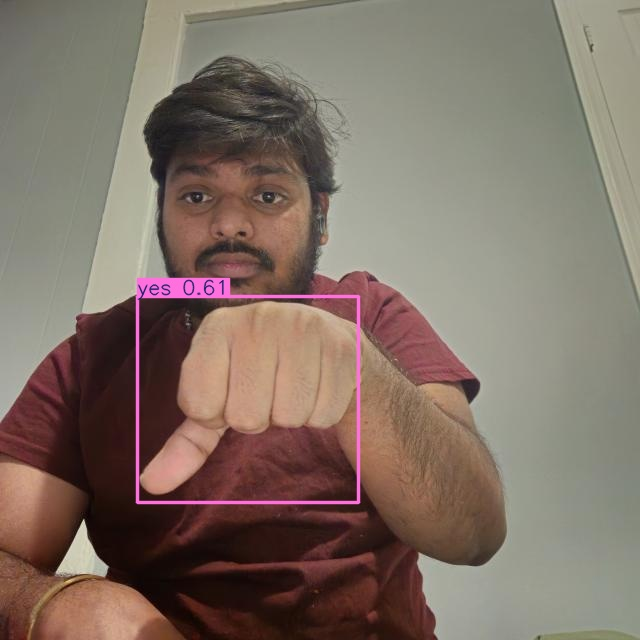

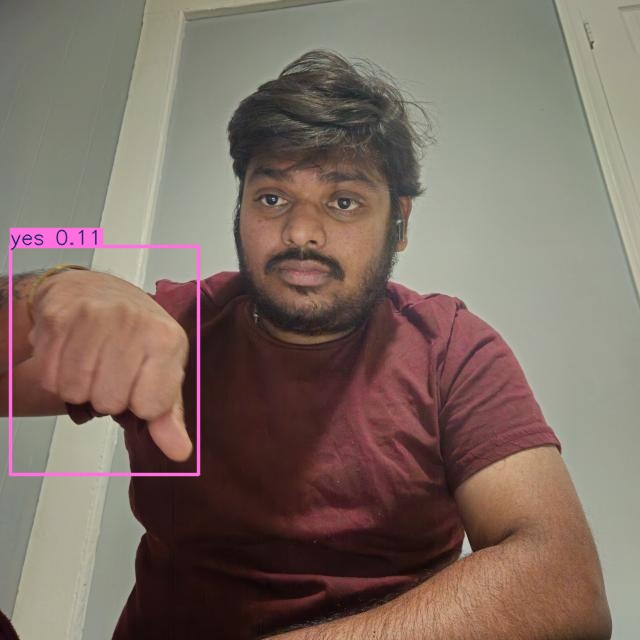

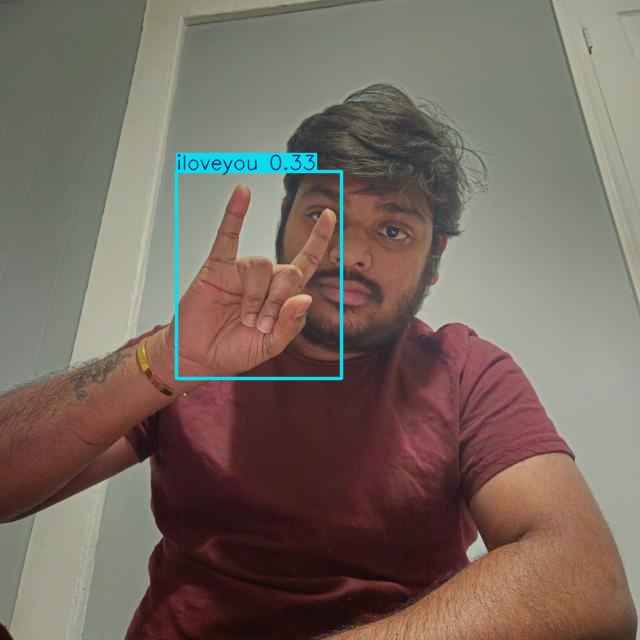

In [40]:
import glob
import os
from IPython.display import Image as IpyImage,display

latest_folder = max(glob.iglob('C:/Program Files/Python311/nlpfinal/runs/detect/predict/'), key=os.path.getctime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
  display(IpyImage(filename=img,width=600))
  print("\n")

In [42]:
# Fetch class names from the predictions
for result in results:
    # Access the boxes attribute which contains the predictions
    boxes = result.boxes  # The predictions for this image
    
    # Access the class names (the dictionary mapping class ids to class names)
    class_names = result.names  # This is a dictionary mapping class ids to class names
    
    # If there are detected boxes, extract class names
    if len(boxes) > 0:
        # Loop through each detected box and get the class ID
        for box in boxes:
            class_id = int(box.cls)  # Class ID (0-indexed)
            class_name = class_names[class_id]  # Get the corresponding class name
            print(f"Predicted class: {class_name}")
    else:
        print("No objects detected in this image.")

Predicted class: yes
Predicted class: yes
Predicted class: yes
Predicted class: iloveyou
No objects detected in this image.


In [44]:
!pip install pyttsx3

In [55]:
import pyttsx3

# Initialize the text-to-speech engine
def set_language(text, language="en", rate="medium"):
    engine = pyttsx3.init()
    voices = engine.getProperty('voices')
    
    # Get the default rate
    current_rate = engine.getProperty('rate')
    
    # Iterate through voices and select one based on the language
    for voice in voices:
        if language in voice.languages or language in voice.id:
            engine.setProperty('voice', voice.id)
            break

    # Adjust rate based on input
    if rate == "slow":
        engine.setProperty('rate', current_rate - 100)  # Decrease rate
    elif rate == "fast":
        engine.setProperty('rate', current_rate + 50)  # Increase rate
    else:
        engine.setProperty('rate', current_rate)  # Default rate

    engine.say(text)
    engine.runAndWait()


# Loop through the results, and for each result, process the predictions
for result_idx, result in enumerate(results):  # result_idx is the index of the current result (image)
    # Access the boxes attribute which contains the predictions
    boxes = result.boxes  # The predictions for this image
    
    # Access the class names (the dictionary mapping class ids to class names)
    class_names = result.names  # This is a dictionary mapping class ids to class names
    
    # If there are detected boxes, extract class names and speak them
    if len(boxes) > 0:
        # Loop through each detected box (object) within the result
        for obj_idx, box in enumerate(boxes):  # obj_idx is the index for each object in the current result
            class_id = int(box.cls)  # Class ID (0-indexed)
            class_name = class_names[class_id]  # Get the corresponding class name
            print(f"Predicted class in object {result_idx + 1}: {class_name}")  # Debug log for prediction
            
            # Speak the class name with the object index
            set_language(f"Detected class in object {result_idx + 1}: {class_name}", language="en", rate="medium")
    else:
        print(f"No objects detected in result {result_idx + 1}.")
        set_language(f"No objects detected in result {result_idx + 1}.", language="en", rate="medium")


Predicted class in object 1: yes
Predicted class in object 2: yes
Predicted class in object 3: yes
Predicted class in object 4: iloveyou
No objects detected in result 5.
2024-12-07 06:32:50,848 - clearml.Task - WARNING - ### TASK STOPPED - USER ABORTED - STATUS CHANGED ###
